<!--

# Final Report - Work in Progress
- Research Hypothesis / Questions:
    - Is Formula 1 fandom Toxic?
    - Are there specific groups that show more toxic behaviour then others?
    - Is the toxicity a "self-made" problem of Formula 1?
- APIs: Youtube
    - (Not reddit as post are often off topic especially during the off season, that we are currently in)
- Methods:
    - TBD
    - Dictionary
        - Formula 1 specific words that are toxic
        - racism / ethnic slurs -> [@ethnic_slurs]
        - toxicity -> [@orthrus-lexicon_orthrus_2022]
        - hate speech -> [@van_der_vegt_grievance_2021]
        - insults -> [@van_der_vegt_grievance_2021]
    - Transformer classifier
        - sentiment -> cardiffnlp/twitter-roberta-base-sentiment-latest [@tweet_sentiment_classifier]
        - hate speech -> Hate-speech-CNERG/dehatebert-mono-english [@racism_classifier]
    - statistical analysis
        - group toxic behavior by drivers and teams
        - group by topics
            - topic modelling?
- Contents:
    - Introduction
        - What is Formula 1
        - Why do we need to analyze this
        - introduce the three research questions / hypothesis
    - Fundamentals
        - Formula 1
        - What is fandom
          - 
        - Defining toxic fan behavior
        - Youtube API
        - Maybe explaining the used methods?
    - Concept
        - What will be done
        - How will i be doing it
    - Creating the Dataset
        - Explain Dataset creation
    - Applying Method 1
    - Applying Method 2
    - Results

-->

# Analysing Toxicity in Formula 1 Fandom - Computational Analysis of Communications Final
Author: Leon Knorr

Matr-Nr: 1902854

## Disclaimer
In order to use Citations in Jupyter Notebook, the whole Notebook has to be converted to markdown and after that, the markdown file has to be compiled with LATEX and the bibliography and bibliography style is injected. Because of that Citations and the bibliography are only visible in the PDF version of the notebook. However because comments contain emojis, and other special characters, the output of each code cell has to be cleared before the notebook is converted otherwise the pdf compile will fail. In addition to that the formating of the code cells in the pdf document is not necessarily perfect. As a result, Citations and bibliography will only be correctly visible in the PDF version, where as code and its output is only visible in the notebook source.

## Introduction
Formula 1 is the highest class of international racing for open-wheel single-seater formula racing cars and is generally considered the most competitive, fastest and hardest class of motor racing. Since it’s first season in 1950, Formula 1 is visiting a diverse list of many different countries, where the best drivers in the world are racing against each other in teams of two drivers to determine the best driver and the best team on the Formula 1 grid [@about_f1]. These events are visited by thousands of Fans, with millions more following them on television and social media. With the 2021 season being one of the closest and most entertaining seasons in the history of Formula 1, where Red Bulls Max Verstappen beat Mercedes driver Lewis Hamilton in the grand finale of the season under controversial circumstances after a full season of controversy, drama and intense on track battles and with the release of Netflix Drive To Survive, Formula 1s popularity is growing rapidly. But, reports of Toxic and abusive Fan behavior at events and in comment sections on social media are accumulating, and casts an ugly shadow over Formula 1s latest successes [@woodhouse_scary_2022].
As the reports over toxic and abusive fan behaviours in social media and at live events are rising, Formula 1 as well as Fans and drivers are taking a stand against toxicity in the Formula 1 community. However, an independent and scientific analysis of this topic is missing and therefore the accusations are sort of hanging in the air without a solid scientific foundation. Therefore, in order to tackle this problem research into the toxicity of Formula 1 fandom is a necassety to gain valuable insights into understanding the problem, where it originates from and to build a foundation for future measures to make attending Formula 1 events as well as the media around it a safer and more enjoyable experience. To take the first step into this direction, this thesis will analyse Youtube comments of the Formula 1 channel in order to determine:

- If the Formula 1 fandom is toxic
- Has Toxicity risen over the years?
- Is the toxicity a "self-made" problem of Formula 1 and where is the toxicity originating from?

## Fundamentals
In this chapter the necessary fundamental knowledge is presented.

### Formula 1
Formula 1 is the worlds most prestigous motor racing competition, as well as the world's most popular annual sporting series [@about_f1]. It marks the highest class of international open-wheel single-seater formula racing. The first Formula 1 competition was held in 1950, since then the competiton for the world drivers championship (wdc) which determines the worlds best driver and the world constructors championship (wcc) which determines the best team, is held annualy and is sanctioned by the Fédération Internationale de l'Automobile (FIA). During the competition (also called a season), Formula 1 visits a variety of different countries and racing tracks, each event (Grands Prix) is attended by thousands of people with millions watching from home [@formula_1_2023]. All rights of the Formula 1 brand and the competition itself is owned by Formula One World Championship Limited, which is a corporation, that provides media distribution and promotion services, besides that, it controls the contracts, distribtution, and commercial management of rights and licenses of formula 1 [@formula_1_limited_company_profile]. The term Formula 1 is used to describe the corporation, as well as the competition, as they can't exist without each other.

### What is Fandom
According to Cornel Sandvoss Fandom is a community of people that are regularly, consuming a given popular narrative or text with great emotional involvement [@toxic_fandom]. The members of the community are called fans, which is a short form of "fanatic" [@arouh_toxic_2020]. In other words, a fandom is a community of people that are fanatic about a popular narrative or text such as a tv series, movie franchise or sports.

Becoming a fan starts with the adoption of a fan identity about a fan object, thus fandom can be a powerful of defining the self. The fan object can be anything that people can be fanatic about, this may be a simple object such as trains or a virtual asset such as a movie franchise. Therefore, by taking part in a fandom, people are expressing themselfs through an identity they've chosen for themselfs. As a result, fans may lead to see the fan object as an extension of themselfs and thus react personally threatened if the fan object is facing a threat such as accusations etc [@toxic_fandom]. In addition to creating a strong part of their own identity, fans feel more connected or socialised through their fandom, as studies indicate, that even if fans don't interact with other members of a fan community, they still perceive themselfs as part of that community. Because of that, fans not only become personally invested in their fandom, they become socially invested as well [@toxic_fandom].

As a result of the strong connection fans build up to their fan object, the time-frame in which this self identity has been chosen is also playing a role. As an example, many people build a fandom in their childhood about a tv series, franchise or sport, this often leads to them feeling entitled to having their fan object preserved as they deem acceptable. This behaviour is also called fan entitlement. A good example for this behaviour are the news movies and series in the Lord of the Rings and Star Wars franchises, as most fan communities of these franchises have been outraged about the new characters and story lines, where many people claimed that this "ruined their childhood" [@toxic_fandom].

From an economic point of view, fandom and fan cultures are seen as the ideal costumers. They are eager to get their hands on the newest products and they are stable with re-occuring purchases, since intense consumption is considered a part of the fan identity [@arouh_toxic_2020].

### Defining Toxic Fan behaviour
In the first place, toxic fandom is a buzzword, that is widely used throughout media to describe or identify fans who engage in behaviors that are considered negative or unaccaptable. This behavior can range from simple negative responses to bullying other members of a fandom or those involved in the creation of the fan object [@toxic_fandom]. Most of this behaviour can be observed online in social media, there are however reports of toxic behaviour in real-life as well, such as abusive behaviour at events.

The word toxic itself however is defined as "of relating to, or caused by a toxin," "of the nature of a poison; poisonous" [@arouh_toxic_2020]. This definition originally originates from medival latin, where it refers to poisoned arrows or to being imbued with poison. Following this definition, it is an *external* substance that is toxic and not a person or their behaviour. However in recent years the understanding of this definition has shifted, today someones actions or the emotions experienced or types of character are now understood as poisonous or "toxic" [@arouh_toxic_2020]. This definition is closely related to the definition of the word fan, as explained earlier, fan originates from fanatic, which is traditionally linked to madness and demonic posession. This traditional and long obselete link is often exploited by media outlets to mark fans as psychopaths whose frustrated fantasies of intimate relationships or unsatisfied desires with the fan object take violent and ant-social forms [@arouh_toxic_2020]. In order to maintain this hypothesis, media often picks the most miserable and negative or "click-bait" examples of fan behaviour, as it creates the most attention and keeps the viewing figures high [@arouh_toxic_2020], [@proctor_editors_2018]. These circumstances are additionally amplified by social media plattforms, as they promote toxic behaviour, because it usually creates a lot of interactions. Therefore, it is our overall understanding of what a fan is that marks a him as a toxic "other".

What is also observed, is that "toxic" fans often fall back to racist and mysogenistic behaviour compared with hate speech in order to defend their fan object or view point. This often comes with a feeling of "power loss" for the "toxic fan". Because of that, current social-, ideological- and political conflicts are becoming more and more frequent as a topic in toxic behaviour [@proctor_editors_2018], [@arouh_toxic_2020], [@toxic_fandom]. For some members of the fan communities, this feeling of power loss is amplified by current political circumstances where they feel a feeling of disempowerment at their loss of priviliged status in society because of gender discussions or woman rights movements. Thus toxic fans are often painted as angry white, heterosexual men or members of the "alt-right" community. However in many cases, fan communities are used as a plattform to spread this hatered or ideological ideas because it creates a lot of attention in social networks as well as from the media. The media then progresses to paint fandom and online culture as more and more toxic because it creates "maximum cultural penetration" [@proctor_editors_2018]. This trend has led to the phenomenon of *progressive toxicity*, where other fans "rush to prove one's moral superiority by speaking out against some racist, sexist or otherwise hurtful sentiment, the sentiment is often amplified on a scale that wouldn't have been possible had people not taken the bait" [@proctor_editors_2018]. This rush to prove morally better than the toxic other often leads to toxic behavior by the defender itself. Because of that, toxic practices more and more frequently are instantiations of larger political or cultural polarizations and they depict the current socio-political climate. Thus toxic fan behaviour is often observed as a conlflict between the "political correct" pro-diversity crowd, which are also called social justice warriors (SJWs) and the members of the so-called "alt-right" hell-bent [@proctor_editors_2018].

However toxic fan behaviour is not limited to racist, misogynistic comments that can also include hate-speech. Some toxic fan are even going as far as to writing death or rape threats, doxing people (doxing refers to leaking personal information online) or to show abusive and harassing behaviour in public against other groups [@proctor_editors_2018], [@arouh_toxic_2020].

## Concept

## The Dataset
The dataset that will be used throughout this thesis consists of 40200 Comments with replys from 500 youtube videos that were uploaded since 2020 of the formula 1 youtube channel. To obtain this data, the Youtube API V3 was used.

First up, the API has to be initialised, for this an api key is needed, that has to be stored in a .env file in the same directory as the jupyter notebook. This api key is then read in the following code cell and the youtube api is initialized through googles official googleapiclient library.

In [2]:
from dotenv import dotenv_values
import googleapiclient.discovery
import pandas as pd

api_keys = dotenv_values("keys.env")
api_service_name = "youtube"
api_version = "v3"
api_key = api_keys["YOUTUBE_API_KEY"]
max_results = 1000
youtube_api = googleapiclient.discovery.build(api_service_name, api_version, developerKey = api_key)

Now request to the Youtube API V3 can be made. Before we can scrape comments, the video id of the video that comments want to be obtain from is needed. Therefore, data about all videos since 2020 until now are requested. However the api will only retrieve 50 items per request, if there are more items that fit the search query the response is paged and contains a *nextPageToken*, that can be used to obtain the next 50 items. Requesting all videos since 2020 allows the dataset to span a timeframe of three years and will allow to analyze toxicity over time as well and will also paint a broader picture of how the F1 fandom developed. After obtaining all video information, the video ids are extracted and safed into a list, which is used later to obtain the actual comment threads.

In [ ]:
Formula1_official_channel = youtube_api.channels().list(part='snippet' ,forUsername='Formula1').execute()['items'][0]
videos_after_2020 = youtube_api.search().list(channelId=Formula1_official_channel["id"],
        maxResults=max_results,
        publishedAfter="2020-01-01T00:00:00Z",
        part='id').execute()
video_ids_after_2020 = [item['id']['videoId'] for item in videos_after_2020['items']]
while len(video_ids_after_2020) < max_results and "nextPageToken" in videos_after_2020.keys():
        videos_after_2020 = youtube_api.search().list(channelId=Formula1_official_channel["id"],
        maxResults=max_results,
        publishedAfter="2020-01-01T00:00:00Z",
        part='id',
        pageToken=videos_after_2020["nextPageToken"]).execute()
        video_ids_after_2020 = video_ids_after_2020 + [item['id']['videoId'] for item in videos_after_2020['items']]


Besides the list of video ids, the data is also parsed into a dataframe. This allows to take general video information such as like count, video title, the overall comment count etc. into consideration for the final analysis.

In [ ]:
df_list = []
for video_id in video_ids_after_2020:
    video_data = youtube_api.videos().list(part='snippet, statistics', id=video_id).execute()
    snippet = video_data['items'][0]['snippet']
    statistics = video_data['items'][0]['statistics']
    df_list.append(
    {
        "video_id":video_id,
        "title": snippet['title'],
        "description": snippet['description'],
        "channel": snippet['channelTitle'],
        "published_at": snippet['publishedAt'],
        "tags": snippet['tags'] if "tags" in snippet.keys() else None,
        "like_count": statistics['likeCount'],
        "favorite_count": statistics['favoriteCount'],
        "comment_count": statistics['commentCount'] if "commentCount" in statistics.keys() else 0
    })

videos = pd.DataFrame(df_list)
videos

Now that all the necessary video information has been obtained, the actual comments and replys can be requested. In order to achieve this, for every video id that has been retrieved earlier, a list of 15 comment threads is requested. Every comment thread consists of a topcomment, that has a number of replys associated with it. Because of the maximum quota of 10000 request units per day, for each video only 15 comments can be obtained, as each comment request costs one unit, for all 500 videos for 15 commenthreads per video, a quota usage of 7500 applies. Now for each retrieved top comment a maximum of 10 replies are requested. The corresponding data, is then parsed into one large dataframe, that contains the comment text as well as administrative information like the video id as well as the comment id and further useful information like the number of likes a comment / reply has or the publishing date. This additional information allows to further reason about the amount of interaction the particular comment got.

In [ ]:
df_list_comments = []
for video_id in video_ids_after_2020:
    if videos.loc[videos['video_id'] == video_id].comment_count.iloc[0] == 0:
        continue
    top_level_comments = youtube_api.commentThreads().list(part="snippet",
        maxResults=15,
        order="relevance",
        videoId=video_id).execute()['items']
    for top_level_comment in top_level_comments:
        replies = youtube_api.comments().list(part="snippet",
            maxResults=10,
            parentId=top_level_comment['snippet']['topLevelComment']['id']).execute()['items']
        df_list_comments.append(
        {
            "video_id": video_id,
            "id": top_level_comment['snippet']['topLevelComment']['id'],
            "text": top_level_comment['snippet']['topLevelComment']['snippet']['textDisplay'],
            "user": top_level_comment['snippet']['topLevelComment']['snippet']['authorChannelId']['value'],
            "like_count": top_level_comment['snippet']['topLevelComment']['snippet']['likeCount'],
            "published_at": top_level_comment['snippet']['topLevelComment']['snippet']['publishedAt'],
            "reply_count": top_level_comment['snippet']['totalReplyCount']
        })
        for reply in replies:
            df_list_comments.append(
            {
                "video_id": video_id,
                "id": reply['id'],
                "text": reply['snippet']['textDisplay'],
                "user": reply['snippet']['authorChannelId']['value'],
                "like_count": reply['snippet']['likeCount'],
                "published_at": reply['snippet']['publishedAt'],
                "reply_count": 0
            })

comment_df: pd.DataFrame = pd.DataFrame(df_list_comments)
comment_df

Last but not least the dataset is saved into a "pickle" file, which allows efficient storage of dataframes. This is especially useful if the notebook has to be restarted because the dataset doesn't has to be build from scratch and no quota or api access is required to perform analysis on the dataset.

In [ ]:
videos.to_pickle("datasets/video_data.pkl")
comment_df.to_pickle("datasets/comment_data.pkl")

In [98]:
videos: pd.DataFrame = pd.read_pickle("datasets/video_data.pkl")
comment_df: pd.DataFrame = pd.read_pickle("datasets/comment_data.pkl")

In [ ]:
videos

### Dataset limitations
Because of the quoate limit google has set for the youtube api, the dataset is only depicting a small section of the actual circumstances in the Formula 1 fandom. For example, for one video, a maximum of $15*10 = 150$ comments will be retrieved.

In [ ]:
videos.comment_count = videos.comment_count.astype(int)
videos.comment_count.mean()

However, on average a video has 1250 comments. Thus a lot of fan interaction will be missed and is not included in this dataset. In addition to that, the dataset only uses the Youtube API as a source, however Formula 1 fandom spans over multiple platforms, especially Twitter, Instagram and Reddit. Thus it is possible that depending on the plattform toxic user interactions may be more frequent as they are governed differently. Also, as Formula 1 is an international sport, comments may not be in english, the dataset therefore must be considered multilingual, which can be problematic depending on the methods used. Nevertheless the dataset spans over a total of 40200 comments that can be analysed.

## Dictionary Analysis
As the first method to analyze the dataset, a dictionary analysis is performed. For this, the following three different online available dictionaries are used:

- Othrus Lexicon for Toxicity [@orthrus-lexicon_orthrus_2022], to classify toxic texts directly
- the Grievance Dictionary [@van_der_vegt_grievance_2021], to classify different categories of negative or unacceptable behaviour
- a dictionary of ethnic slurs based of wikipedia [@ethnic_slurs], to find toxic behaviour based on racism

In order to achieve a fast and reusable way of analysing comments with any of the given dictionaries, each dictionary and comment text will be represented as a set. Between those two sets, the set intersection is computed, which contains all words that are found in the dictionary and in the comment text. Thus it essentially checks for word occurence. The number of words from the dictionary is then added to the result dataframe. In addition to that, a global counter tracks the number of overall occurences of each dictionary word. This allows for the analysis of language biases or trends in Formula 1 fandom. This method is used for all given dictionaries.

In [99]:
import numpy as np
from collections import Counter
from typing import Tuple
from nltk import word_tokenize

def dictionary_analysis_over_set_intersection(dict_name: str, dict_set: set, data: pd.DataFrame) -> Tuple[pd.DataFrame, Counter]:
    dict_word_counter: Counter = Counter()
    dict_word_count: list = []
    for row in data.text:
        dict_words_in_comment: set = set(word_tokenize(row)).intersection(dict_set)
        dict_word_counter.update(dict_words_in_comment)
        dict_word_count.append(len(dict_words_in_comment))
    data[f"{dict_name}_word_count"] = dict_word_count
    return data, dict_word_counter

### Othrus-Lexicon for Toxicity
The Othrus-Lexicon for Toxicity is a dictionary containing words often used throughout the internet in toxic content [@orthrus-lexicon_orthrus_2022]. It contains about 1900 words that include slurs, insults and common internet abbreviations and obfuscations, such as "sh*t", which are used to bypass automatic content moderation systems. Other then the Github page, nothing else can be found on the internet about this dictionary, therefore nothing is known about creation process or if and how the dictinoary has been validated. Nonetheless it will be used during this thesis to provide additional insights into the toxicity of Formula 1 fandom as it fits the topic perfectly but its results have to be treated with caution.

In order to use the Othrus-Lexicon for Toxicity, the dictionary has to be read from the provided "toxic_words.txt" text file and is then converted into a set. The set conversion will remove duplicates and ensures compatibility with the previously introduced method of set intersection for word occurence, which is used to analyse the dataset.

In [100]:
with open("dictionaries/toxic_words.txt") as toxic_words_file:
    set_of_toxic_words: set = set([word.strip() for word in toxic_words_file.readlines()])
set_of_toxic_words

{'insanity',
 'penetrated',
 'dumb ass',
 'poontang',
 'rapists',
 'creeps',
 'garbage',
 'selfsatisfied',
 'nasty',
 'cnut',
 'terrorists',
 'goldigger',
 'cocksucking',
 'f--k',
 'fringin',
 'gaybob',
 'sycophants',
 'cumjockey',
 'radicals',
 'dumbasses',
 '5h1t',
 'cyberfuck',
 'brotherfucker',
 'unruly',
 'bumbler',
 'dimwitted',
 'opportunistic',
 'cumguzzler',
 'shiting',
 'drumpf',
 'denglish',
 'daft',
 'supremacist',
 'shitbagger',
 'islamophobe',
 'mo-fo',
 'dicktickler',
 'bi+ch',
 'whiteys',
 'idiocy',
 'embarrassment',
 'cunthole',
 'mick',
 'sham',
 'burning',
 'spunk',
 'looney',
 'butthole',
 'asswad',
 'idiocies',
 'dumbie',
 'bammers',
 'bloodthirsty',
 'un-smart',
 'f u c k e r',
 'gooch',
 'homosexualists',
 'urine',
 'ignoramu',
 'hatefilled',
 'sucker',
 'bugger',
 'thugs',
 'butt plug',
 'crazed',
 'psycho',
 'nutter',
 'traitorous',
 'masterbat*',
 'pron',
 'pornos',
 'anti-military',
 'f-----g',
 'unwashed',
 'demon',
 'fuckhole',
 'raving',
 'puto',
 'asshat'

In [101]:
comment_df, toxic_word_counter = dictionary_analysis_over_set_intersection(dict_name="toxic", dict_set=set_of_toxic_words, data=comment_df)
comment_df.loc[comment_df["toxic_word_count"] > 0]

,video_id,id,text,user,like_count,published_at,reply_count,toxic_word_count
16,FZjG3oft5rs,UgwRx2dFc5pnjsGjCdh4AaABAg.9VVdHdnh2yK9VYnTuEtgR-,It&#39;s become such a meme that everyone star...,UC6X1kUf-avVsUgveP9JJnlQ,1,2021-12-05T01:26:20Z,0,1
26,FZjG3oft5rs,UgzKS4j0zSepgYatXqF4AaABAg.9VVc8vc96Mb9VXxGtDQcPc,@Nikolay Panayotov no i would not care . as lo...,UC9NuVWBlxdueOgoXJOZQFkQ,1,2021-12-04T17:32:42Z,0,2
36,FZjG3oft5rs,UgyHMakWj8e1MZS4Bi94AaABAg.9VVdgPwr1Pk9V_MNHbB9Zx,"Without him, the front of the field would be l...",UCJeq6aCoT2Os5F7-Li2GYfw,1,2021-12-05T15:59:15Z,0,1
65,FZjG3oft5rs,UgwDLBFFYyM-F_WxQkV4AaABAg.9VVcaRNVn0H9VVqx-nSSmz,@PolarPenguin How was he robbed of points in B...,UCJOoF1lDfv39IpAHMfz8nQA,2,2021-12-03T21:58:56Z,0,1
66,FZjG3oft5rs,UgwDLBFFYyM-F_WxQkV4AaABAg.9VVcaRNVn0H9VVp3onuetR,@PolarPenguin How can you be robbed of points ...,UCp9qNkL-YwL8dPrKi2eiQNQ,16,2021-12-03T21:42:32Z,0,1
...,...,...,...,...,...,...,...,...
40128,v6asa9zegAs,Ugzvsp_8rQ224V7hfQ54AaABAg.9YaMQ52NxsE9YhkCCUHtbI,The side looks like a fat guy sat on it but be...,UCtauTDQYf6h_8c-9ty8rCJA,0,2022-02-21T11:44:18Z,0,2
40135,v6asa9zegAs,UgysXm_H7fFhGvm9OlN4AaABAg.9Y_pOrDe4HI9Ya3t0F6Uq6,@Kevin Mazariegos I was thinking the same. It ...,UCnn1N9y6zV2Kvx91za3E0rw,0,2022-02-18T12:11:07Z,0,1
40144,v6asa9zegAs,UgwtsMLjjhALR8KB-9R4AaABAg.9Y_qrj8kYrc9Y_v4wOinCF,The car is gonna insane,UCgZUEWZBPy-X2fkj1Edu0hg,1,2022-02-18T10:45:30Z,0,1
40162,v6asa9zegAs,UgzLGWxK7PbHQ0TMfKB4AaABAg,George touching the rear wing when they walk u...,UCf3jvMJiCAQy7OLJTQjgq1Q,204,2022-02-18T10:17:20Z,9,1


In [ ]:
toxic_word_counter

### Grievance Dictionary
The Grievance Dictionary proposed by van der Vegt et. al. aims to provide a method to automatically understand language use in the context of grievance-fuelled violence threat assessement [@van_der_vegt_grievance_2021]. It has been created out of informed suggestions from experienced threat assesement practitioners in combination with subsequent humand and computational word list generation. The resulting dictionary includes 20502 words which were annotated by 2318 participants. In its validation process, it was applied to texts written by violent and non-violent individuals. The results showed strong evidence for a high classification performance [@van_der_vegt_grievance_2021].

The dictionary itself is composed of multiple categories which depict different forms of grievance, for example jealousy or threat. Each category includes a number of word stems, annotated with weights, which indicate how important or meaningful the given word is for the category it is included in. There are two version of the dictionary available, one which includes words with weights of five or higher and one which includes words with weights of seven or higher. During this thesis the dictionary with weights higher than five will be used, as it can hypothetically cover more infrequent and domain specific words. The dictionary can support three different approaches to text classification [@van_der_vegt_grievance_2021]:

- **Proportional Scoring**: Proportional scoring or wordcount-based classification, calculates the proportion of grievance fueled words in the given texts. This proportion is then used as a classification measure.
- **Weight-based**: During this approach, the assigned word weights are used to obtain a weight average for each given text, which is used as the classification measure.
- **Word inclusion**: Word inclusion checks if and how often the given words from the dictionary are included in the text.

In order to be able to analyse the dataset with the grievance dictionary, all comment texts have to be stemmed. For that, the Porterstemmer, word_tokenize and TreebankWordDetokenizer from the natural language toolkit will be used. First, the comment dataset will be copied, this ensures, that the original texts won't be affected by the applied dictionary specific processing. Then, the text column will be manipulated through the swifter module, which ensures efficient and automatic parrallelization. During manipulation, the text is split up into tokens, then converted to its word stem by the Porterstemmer and detokenized by the TreebankWordDetokenizer. This process essentially converts the original text into the same text sequence but it is composed of word stems instead of the actual words.

In [102]:
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk import TreebankWordDetokenizer
import swifter

stemmer: PorterStemmer = PorterStemmer()
detokenizer: TreebankWordDetokenizer = TreebankWordDetokenizer()
stemmed_comments: pd.DataFrame = comment_df.copy()
stemmed_comments["text"] = stemmed_comments.text.swifter.apply(lambda text: detokenizer.detokenize([stemmer.stem(word) for word in word_tokenize(text)]))
stemmed_comments


Pandas Apply:   0%|          | 0/40200 [00:00<?, ?it/s]

,video_id,id,text,user,like_count,published_at,reply_count,toxic_word_count
0,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg,that super max at the end wa fantast,UCmCBpDZeM9LbTeWbMPW1N2A,4626,2021-12-03T19:48:05Z,48,0
1,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9eDYvXWpXVD,@ iiillliii i got cold,UCQtwk7iBtv0hTwedp13yDKA,0,2022-08-02T08:40:19Z,0,0
2,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9Xuy0JALbx9,@ miz is awesom oh ye.,UCuzQCuC86Pmhq9ixSff1z-A,0,2022-02-01T18:23:44Z,0,0
3,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9WVZKoNgEnu,"yea that is a fact, but if i would write like ...",UCgFRK81ZtgryEHR6GAxbWvQ,1,2021-12-28T15:47:42Z,0,0
4,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9WU5cOYUMFW,@ miz is awesom didn ’ t age to well ehh?,UCADfAgrwLT4ZzpGkC8L-4gw,0,2021-12-28T02:08:51Z,0,0
...,...,...,...,...,...,...,...,...
40195,g5yQmp1ctXk,UgwZ6iauaq1cULpaUvR4AaABAg,how you manag juncao is so amaz . that ha to b...,UCmHLqIoiFsxOwsIEsqAVgzQ,0,2022-11-16T11:01:58Z,0,0
40196,g5yQmp1ctXk,Ugxb7TesuwCHGhDxZRJ4AaABAg,absolut brillianc from seb on the radio as alw...,UCalYkEFZn7f91L316msDu7Q,0,2022-11-25T16:01:06Z,0,0
40197,g5yQmp1ctXk,Ugx4RZlmzo8UHnkajsB4AaABAg,i & #39; ll come back from time to time to wat...,UCYDZKuIlaaGAR-BOvs7W63Q,1,2022-11-10T01:40:42Z,0,0
40198,g5yQmp1ctXk,UgxbU_9pwAhxAIQkcRp4AaABAg,go to miss seb!,UCd4Bo6BxK0PHQnukaxeqnZg,1,2022-11-10T21:19:20Z,0,0


After preprocessing the dataset, the grievance dictionary can be loaded. As it is stored in a .csv file, the pandas read_csv function can be used to read the dictionary into memory. However, the csv includes a seperate unnamed index, which needs to be dropped.

In [103]:
from collections import defaultdict
from typing import Dict

grievance_dict_df = pd.read_csv("dictionaries/grievancedictionary/dictionary_versions/dictionary_5plus.csv")
grievance_dict_df.drop(["Unnamed: 0"], axis=1, inplace=True)
categorys = grievance_dict_df.category.unique()
categorys

array(['deadline', 'desperation', 'fixation', 'frustration', 'god',
       'grievance', 'hate', 'help', 'honour', 'impostor', 'jealousy',
       'loneliness', 'murder', 'paranoia', 'planning', 'relationship',
       'soldier', 'suicide', 'surveillance', 'threat', 'violence',
       'weaponry'], dtype=object)

As the dictionary made up of several categories, a set for each dictionary category has to be created in order to ensure compatibility with the dictionary over set intersection function, that was presented earlier. Now for each category, the texts are analyzed using this method. However instead of saving one counter, that counts word occurences, a dictionary which stores each counter for its given category.

In [104]:
from tqdm import tqdm
grievance_set_dictionary: Dict[str, Counter] = defaultdict(Counter)
for category in tqdm(categorys):
    curr_category_set = set(grievance_dict_df.loc[grievance_dict_df.category == category].word.to_list())
    stemmed_comments, grievance_set_dictionary[category] = dictionary_analysis_over_set_intersection(dict_name=category, dict_set=curr_category_set, data=stemmed_comments)
stemmed_comments

100%|██████████| 22/22 [00:57<00:00,  2.61s/it]


,video_id,id,text,user,like_count,published_at,reply_count,toxic_word_count,deadline_word_count,desperation_word_count,...,murder_word_count,paranoia_word_count,planning_word_count,relationship_word_count,soldier_word_count,suicide_word_count,surveillance_word_count,threat_word_count,violence_word_count,weaponry_word_count
0,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg,that super max at the end wa fantast,UCmCBpDZeM9LbTeWbMPW1N2A,4626,2021-12-03T19:48:05Z,48,0,1,1,...,1,0,0,1,0,1,0,0,0,0
1,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9eDYvXWpXVD,@ iiillliii i got cold,UCQtwk7iBtv0hTwedp13yDKA,0,2022-08-02T08:40:19Z,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9Xuy0JALbx9,@ miz is awesom oh ye.,UCuzQCuC86Pmhq9ixSff1z-A,0,2022-02-01T18:23:44Z,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9WVZKoNgEnu,"yea that is a fact, but if i would write like ...",UCgFRK81ZtgryEHR6GAxbWvQ,1,2021-12-28T15:47:42Z,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
4,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9WU5cOYUMFW,@ miz is awesom didn ’ t age to well ehh?,UCADfAgrwLT4ZzpGkC8L-4gw,0,2021-12-28T02:08:51Z,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40195,g5yQmp1ctXk,UgwZ6iauaq1cULpaUvR4AaABAg,how you manag juncao is so amaz . that ha to b...,UCmHLqIoiFsxOwsIEsqAVgzQ,0,2022-11-16T11:01:58Z,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
40196,g5yQmp1ctXk,Ugxb7TesuwCHGhDxZRJ4AaABAg,absolut brillianc from seb on the radio as alw...,UCalYkEFZn7f91L316msDu7Q,0,2022-11-25T16:01:06Z,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40197,g5yQmp1ctXk,Ugx4RZlmzo8UHnkajsB4AaABAg,i & #39; ll come back from time to time to wat...,UCYDZKuIlaaGAR-BOvs7W63Q,1,2022-11-10T01:40:42Z,0,0,3,2,...,0,1,1,0,0,0,1,0,0,0
40198,g5yQmp1ctXk,UgxbU_9pwAhxAIQkcRp4AaABAg,go to miss seb!,UCd4Bo6BxK0PHQnukaxeqnZg,1,2022-11-10T21:19:20Z,0,0,1,2,...,0,0,1,0,0,0,0,0,0,0


Last but not least, the results stored in the stemmed dataset needs to be merged into the original one using the pd.merge function.

In [107]:
comment_df = pd.merge(comment_df, stemmed_comments[["deadline_word_count", "desperation_word_count", "fixation_word_count", 'frustration_word_count', 'god_word_count',
       'grievance_word_count', 'hate_word_count', 'help_word_count', 'honour_word_count', 'impostor_word_count', 'jealousy_word_count',
       'loneliness_word_count', 'murder_word_count', 'paranoia_word_count', 'planning_word_count', 'relationship_word_count',
       'soldier_word_count', 'suicide_word_count', 'surveillance_word_count', 'threat_word_count', 'violence_word_count',
       'weaponry_word_count']], left_index=True, right_index=True)
len(comment_df)

40200

### Ethnic Slurs
The third dictionary to be used has been created out of a scrape of the wikipedia page for ethnic slurs [@ethnic_slurs]. The page list all known ethnix slurs in alphabetical order, including their targets, meaning and origin. In order to scrape the website, the webbased tool [wikitable2csv](https://wikitable2csv.ggor.de) has been used. This tool allows the conversion of tables on wiki websites into .csv files. As Wikipedia lists every slur in alphabetical order with one table per letter, a total of 26 .csv files are created. Thus, in order to use the dictionary, all .csv files are in the directory are listed and loaded into their own dataframe, which are then concatinated to form one big dictionary of ethnic slurs.

In [108]:
from os import listdir
import os.path

dict_files: list = list(filter(lambda f: f[-4:] == ".csv" ,listdir("dictionaries/ethnic_slurs/")))
dict_df: pd.DataFrame = pd.DataFrame()
for file in dict_files:
    part = pd.read_csv(os.path.join("dictionaries/ethnic_slurs", file))
    dict_df = pd.concat([part, dict_df])
dict_df.reset_index(inplace=True, drop=True)
dict_df

,Term,Location or origin,Targets,"Meaning, origin and notes",References
0,"Eight ball, 8ball",NaN,Black people,"Referring to the black ball in pool. Slang, us...",NaN
1,Eyetie,"United States, United Kingdom",Italian people,"Originated through the mispronunciation of ""It...",NaN
2,"Dago, Dego","United States, Commonwealth","Italians, Spaniards, Portuguese people","Possibly derived from the Spanish name ""Diego""",NaN
3,"Dago, Dego",United States,Italian people,NaN,NaN
4,Dal Khor,Urdu-speaking people,Indians and Pakistanis (specifically Punjabis),"The term literally translates to ""dal eater"", ...",NaN
...,...,...,...,...,...
424,Huinca,"Argentina, Chile","Non-Mapuche Chileans, non-Mapuche Argentines",Mapuche term dating back at least to the Conqu...,NaN
425,Hun,"United States, United Kingdom",German people,"(United States, United Kingdom) Germans, espec...",NaN
426,Hun,Ireland,Protestants and British soldiers,A Protestant in Northern Ireland or historical...,NaN
427,"Hunky, Hunk",United States,Central European laborers.,It originated in the coal regions of Pennsylva...,NaN


Now, to be able to reuse the dictionary over set intersection method, the list of terms / slurs in the dictionary are converted into set and then passed onto the method alongside the comment dataset.

In [109]:
ethnic_slurs_set: set = set(dict_df.Term.to_list())
comment_df, ethnic_slurs_counter = dictionary_analysis_over_set_intersection(dict_name="ethnic_slurs", dict_set=ethnic_slurs_set, data=comment_df)
comment_df.loc[comment_df["ethnic_slurs_word_count"] > 0]

,video_id,id,text,user,like_count,published_at,reply_count,toxic_word_count,deadline_word_count,desperation_word_count,...,paranoia_word_count,planning_word_count,relationship_word_count,soldier_word_count,suicide_word_count,surveillance_word_count,threat_word_count,violence_word_count,weaponry_word_count,ethnic_slurs_word_count
431,lX0rXb7gqrU,Ugz1sXMTvNTUYAw0HsN4AaABAg,Mick&#39;s little &quot;RAWR&quot; is absolute...,UCjqGkDwAUy7GHWjAXZ6q-fw,1684,2022-08-06T22:03:15Z,4,0,1,0,...,0,1,0,0,0,0,0,0,1,1
475,lX0rXb7gqrU,Ugw1cZC76106B9-vnUJ4AaABAg,I’m dying at Mick’s “rawr” when he shows the d...,UCIYRowSxRLrYej_QuHBpmDQ,140,2022-08-07T08:46:47Z,0,0,0,0,...,1,0,0,1,1,1,0,1,1,1
885,Laz6i7970Ys,UgwX6btkQoGJUbG9yl54AaABAg.9LiQYA3sbPR9LtCzn1_t3J,Mick&#39;s is also from the paddock.,UC7_9Ynd1sRJXGpaJ-pW6smw,2,2021-04-08T19:48:08Z,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2434,m8tGGT-N9AA,UgxtvD1tZSrqV4t4Gel4AaABAg.9e1aS1QCjPI9e2B_gnrjfM,@António Taveira gentleman? He drove into Hami...,UCLLM_9awwydQCOf3kGIwVGA,0,2022-07-28T22:44:43Z,0,1,1,1,...,1,0,2,1,1,1,1,2,0,1
3996,I1WEmbI12H4,UgzGiDkS5UhFiWKkCRV4AaABAg.9Ao68erlL6N9AoMXqEVYaW,Apple Man yeah but he wasn’t on the podium thi...,UCec3onObanftQ7JAURFY_BQ,0,2020-07-07T12:50:01Z,0,0,1,0,...,1,0,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36924,iaicuH7q248,UgxTlNSAGQNyo_-x-SJ4AaABAg.9dlCMJ9x2aW9dmc-moK5vA,@Charlie mccahill agree goodluck this weekend,UCtqDhHlfIH3TqrCdwK_7EBw,1,2022-07-22T12:17:16Z,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
36929,iaicuH7q248,UgxTlNSAGQNyo_-x-SJ4AaABAg.9dlCMJ9x2aW9dmBTk8ZpS9,@Charlie mccahill When&#39;s the next upgrade ...,UC5aaxPMB7S5XWFN1Vnx8q9g,2,2022-07-22T08:16:41Z,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
37600,lsdqnsre1Ik,UgxV81WeTY0dy3kSqet4AaABAg.9BuLmtwSMCO9BwDy5BblH3,If Mick Schumacher got 4th he would be there i...,UC11AwLSHfnhT-Va2tTRs47Q,6,2020-08-04T10:40:25Z,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
38849,SbDc8oAP2LE,UgxXlnYbYFenP8H5j5B4AaABAg,Mick’s interview is basically just a floating ...,UCGKGiQex5tU4HzJTgBNSZjw,813,2022-04-07T19:17:08Z,19,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
ethnic_slurs_counter

After the dataset has been analysed with all three dictionaries, the resulting dataframe, that includes the dictionary word overlap counts per comment, is saved to disk. This allows for efficient reloading without the need of reexecution for the analysis of the acquired data.

In [110]:
comment_df.to_csv("datasets/comment_df_dicts.csv" ,index=False)

## Transformer Classifiers

As the second method for analysing the dataset, two transformer based text classifiers are used. One which classifies the sentiment of a given comment by marking it positive or negative and one which classifies the comment as hate speech or not.

A Transformer is an attention based machine learning architecture, that is made of multiple layers of encoders and decoders. A given text is first transformed into a basic numerical representation, which is enriched with positional information. This representation also called encoding, is then passed on to the stack of $n$ encoders, which compute an information rich embedding. This embedding represents the texts meaning, words and other metadata in multi-dimensional space. It is then injected into the decoder stack, which generates a new text sequence, based of already generated characters and the embedding from the encoders [@vaswani_attention_2017]. Today, many variations of the original transformer architecture exist, some are only using the encoder stack, while others only use the decoder stack. The most well known variations are BERT (Bi-directional Encoder Representations for Transformers) and Open-AIs GPT (Generative Pre-Trained Transformer).

In order to use the dataset with transformer models, some pre-processing has to be applied. It consists of removing html or other structured script language content, links and anonymizing user mentions. In addition to cleaning the input texts, some comments have to be removed from the overall dataset, as they are either in a different language or consist of unreadable gibberish, which leads to issues while running some transformer models.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import swifter
from bs4 import BeautifulSoup

def preprocess(text):
    new_text = []
    text = BeautifulSoup(text, "lxml").text
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Delete unreadable comments that result in the models crashing
comment_df.drop([14603], inplace=True) # comment is full of random characters
comment_df.drop([27224, 27223], inplace=True) # comment is not in english
comment_df.reset_index(drop=True)

comment_df_for_transformers = comment_df.copy()
comment_df_for_transformers["text"] = comment_df_for_transformers.text.swifter.apply(lambda text: preprocess(text))
comment_df_for_transformers

### Sentiment

The first transformer model is used to classify the sentiment of a given comment into positive or negative. Even though this is not a direct classification of typical toxic behaviour like racism or hate speech as sorrow text will also be classified as negative, it still hints towards the overall sentiment inside Formula 1 fandom.

The text-classification transformer used in this thesis is the "distilbert-base-uncased-finetuned-sst-2-english" [@distilbert_sentiment] model. It is a fine-tuned version of the "DistilBERT-base-uncased" on the SST-2 (Stanford Sentiment Treebank corpus) [@sst-2] for sentiment classification. The model has been validated on SST-2 as, well as on the GLUE (General Language Understanding Evaluation Benchmark)[@wang2019glue]. On both Datasets, the model reaches scores over 0.9 (1 being the highest possible score) across the board, with scores around 0.98 in all metrics for sentiment classification [@distilbert_sentiment]. However it can only work with english text. Besides the proven classification performance, the model can produce biased predictions. As an example, in this map (taken from: [@distilbert_sentiment]):
![prediction_map](./images/map.jpeg)
the prediction scores for producing a positive sentiment per *country name* are depicted. It can be observed, that the probabilisty vary drastically between different countries. It has been shown, that for the sentence "This film was filmed in COUNTRY", "France" will produce a positive label with a probability of 0.89 but "Afghanistan" will only produce a positive label with a probability of 0.08, even though nothig in the text hinted at a semantic shift [@distilbert_sentiment]. As these kind of models are trained unsupervised, this is an unintentional side-effect. Nonetheless, the model is a powerful, reliable and well tested sentiment classifier and will thus be used during this thesis.

An alternative to the distilbert-base-uncased-finetuned-sst-2-english are models like the "cardiffnlp/twitter-roberta-base-sentiment-latest" [@tweet_sentiment_classifier] model, that has been trained to classifiy tweets this included working with emojis, irony, offensive language and hatespeech, which would in theory be a better fit for the domain of this research. However, the model has been shown to produce scores around 0.65 or lower, which is comparatively low for sentiment classification tasks. Besides that, no bias analysis has been done on the model or the train dataset [@tweet_sentiment_classifier], which poses a risk in using this model, especially as twitter has been shown to be a plattform that includes a lot of toxicity and hateful content [arouh_toxic_2020]. In addition to that, the tokenizer of the model has been trained without a truncation token (\[TRUNC\]), which is used to trim text sequences that are longer than the supported maximum length of the model. In the initial release, this hasn't been a problem as the average tweet in the dataset is reported to be 100 tokens long, and the models maximum length is at 512 tokens. However, the Youtube comments included in the acquired dataset have often shown to produce longer sequences than 512 tokens and thus are in need to use the truncation token. But, using the truncation token produces a vocabulary length mismatch between the tokenizer and the model, which leads to the model crashing during processing.

In order to implement the distilbert-base-uncased-finetuned-sst-2-english the common "Huggingface", also called "pytorch-transformers" library is used. It enables fast and easy access to hundreds of models available on the Huggingface model hub. First up, the tokenizer, config and model are initialized with the pre-trained weights available on the model hub for the distilbert-base-uncased-finetuned-sst-2-english model. Now every comment is fed sequentially into the model by first encoding it with the tokenizer and then passing the encoded input through the actual transformer model. This will return a tensor with classification information as well as further metadata. The classification data is extracted from the model und run through a softmax to obtain the actual prediction scores for the classes, which are represented by their vector positions. The vector is then sorted via an argsort to obtain the highest vector position, which is converted into the actual label. Both the score and the label are then appended to a score and label list, which are injected into the global data frame at the end of the processing loop.

In [ ]:
from tqdm import tqdm

MODEL = "distilbert-base-uncased-finetuned-sst-2-english"
config = AutoConfig.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

label_list = []
score_list = []

for text in tqdm(comment_df_for_transformers.text.to_list()):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    label_list.append(config.id2label[np.argsort(scores)[::-1][0]])
    score_list.append(max(scores))

comment_df["sentiment"] = label_list
comment_df["sentiment_score"] = score_list
comment_df

<AxesSubplot: >

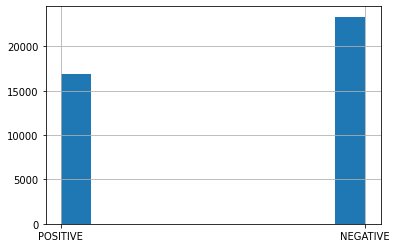

In [9]:
comment_df.sentiment.hist()

In [8]:
comment_df.to_csv("datasets/comment_df_sentiment_transformer.csv" ,index=False) # df caching to save processing time on reload

### Hate Speech

The second transformer classifier used during this thesis is the "Hate-speech-CNERG/dehatebert-mono-english" transformer. It aims to classify into hate speech containing texts and texts without hate speech [@hate_speech_classifier]. As hate speech is part of content that is considered toxic, the classification results are a direct indicator if Formula 1 fandom is toxic or not.

The model is a derivative of the BERT transformer family and can only work with english texts [@hate_speech_classifier]. It has been trained on a combined dataset from 6 publicly available hate speech datasets, which include examples from sources like Twitter and Stormfront. During validation and testing, the model achieved a score of 0.71, with that being the highest score reached over all models tested. It has been shown, that it performs best in high ressource settings, where the dataset has to contain more then 256 datapoints. During model development, Aluru et. al. conducted research into trying to understand based on which text fragments, the model makes it predictions. This research suggested, that the model is not heavily influenced by the presence of certain keywords, it rather looks for the context in which the words appear in [@hate_speech_classifier]. Thus, verbs like hunt or expel are receiving higher attention values from the model, then a direct insult. However, the presence of a verb which could be bad is not enough to lead the model to classify text as hate, only if a verb is paired with an insult or a direct target or in other words if the context fits, the model will predict hateful content. As an example, "Mexicans are f\*\*king great people" will be classified as non-hate even though it contains the word f\*\*ck. However, "I f\*\*king hate ni\*\*ers!" will be classified as hate speech. In addition to that, the model can understand internet obscurtions in insults, such as "f\*\*ck". It can also connect text sequences to background knowledge, such that "6 million was not enough. Next time ovens will be the last of your concerns" will be classified as hate speech, even though no insult or direct attack was given [@hate_speech_classifier]. The model however is able to understand the unmentioned target of the sequence in this case jews and that it relates to the crueltys during the holocaust in germany.

For the actual implementation, the same process as for the sentiment classifier is reused, as only the model id needs to be changed and model weights etc. will be loaded automatically.

In [ ]:
MODEL = "Hate-speech-CNERG/dehatebert-mono-english"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

label_list = []
score_list = []

for text in tqdm(comment_df_for_transformers.text.to_list()):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=514)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    label_list.append(config.id2label[np.argsort(scores)[::-1][0]])
    score_list.append(max(scores))

comment_df["hate_speech_label"] = label_list
comment_df["hate_speech_score"] = score_list
comment_df

In [22]:
comment_df.to_csv("datasets/comment_df_hate_speech_transformer.csv", index=False)

<AxesSubplot: >

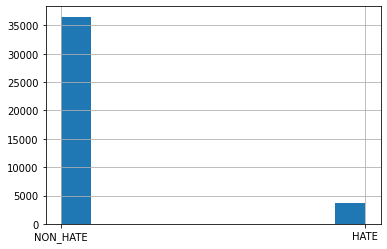

In [26]:
comment_df.hate_speech_label.hist()

## Results
In this chapter the the three research questions:

- Is Formula 1 Fandom Toxic?
- Has toxicity risen over the years?
- Is Toxicity in Formula 1 a self-made problem?

### Is Formula 1 Fandom Toxic?


In [111]:
import pandas as pd
comment_df_dictionarys = pd.read_csv("datasets/comment_df_dicts.csv")
comment_df_hate_speech = pd.read_csv("datasets/comment_df_hate_speech_transformer.csv")
comment_df_sentiment = pd.read_csv("datasets/comment_df_sentiment_transformer.csv")
videos: pd.DataFrame = pd.read_pickle("datasets/video_data.pkl")

print(len(comment_df_dictionarys))
print(len(comment_df_hate_speech))
print(len(comment_df_sentiment))

comment_df = pd.merge(comment_df_dictionarys, comment_df_hate_speech[["hate_speech_label", "hate_speech_score"]], left_index=True, right_index=True)
comment_df = pd.merge(comment_df, comment_df_sentiment[["sentiment", "sentiment_score"]], left_index=True, right_index=True)
comment_df

40261
40258
40258


,video_id,id,text,user,like_count,published_at,reply_count,toxic_word_count,deadline_word_count,desperation_word_count,...,suicide_word_count,surveillance_word_count,threat_word_count,violence_word_count,weaponry_word_count,ethnic_slurs_word_count,hate_speech_label,hate_speech_score,sentiment,sentiment_score
0,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg,THAT SUPER MAX AT THE END WAS FANTASTIC,UCmCBpDZeM9LbTeWbMPW1N2A,4626.0,2021-12-03T19:48:05Z,48.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.834046,POSITIVE,0.999866
1,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9eDYvXWpXVD,@IIIlllIII I got cold,UCQtwk7iBtv0hTwedp13yDKA,0.0,2022-08-02T08:40:19Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.905650,NEGATIVE,0.999119
2,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9Xuy0JALbx9,@Miz is Awesome oh yes.,UCuzQCuC86Pmhq9ixSff1z-A,0.0,2022-02-01T18:23:44Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.794499,POSITIVE,0.999795
3,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9WVZKoNgEnu,"Yea that is a fact, but if i would write like ...",UCgFRK81ZtgryEHR6GAxbWvQ,1.0,2021-12-28T15:47:42Z,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.972921,NEGATIVE,0.942205
4,FZjG3oft5rs,UgznjAR9SoXoE0gpoK54AaABAg.9VVbyYu52Uy9WU5cOYUMFW,@Miz is Awesome didn’t age to well ehh?,UCADfAgrwLT4ZzpGkC8L-4gw,0.0,2021-12-28T02:08:51Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.765529,POSITIVE,0.728659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40253,g5yQmp1ctXk,UgwYjQSluPT9pYbVknJ4AaABAg,Vettel doing Vettel things and that’s joking a...,UCKZKVts1hyZ9Vg149NL267g,9.0,2022-11-09T22:30:13Z,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.971722,POSITIVE,0.999800
40254,g5yQmp1ctXk,UgyOpjpXc9GdIWr7mhl4AaABAg,Seb is a tripod.💀💀💀,UC0B6UmuxyHrgBdUx4yI8kvQ,111.0,2022-11-09T21:31:18Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.957729,POSITIVE,0.999699
40255,g5yQmp1ctXk,UgzBDOUYZME1zWp1SgF4AaABAg,❤ Seb<br><br>You’ll be missed.,UCm5SRjwqe0kvPdEnmnvFpWQ,2.0,2022-11-10T00:14:05Z,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.847179,POSITIVE,0.997790
40256,g5yQmp1ctXk,UgwZ6iauaq1cULpaUvR4AaABAg,How you managed Juncao is so amazing. That has...,UCmHLqIoiFsxOwsIEsqAVgzQ,0.0,2022-11-16T11:01:58Z,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NON_HATE,0.975438,NEGATIVE,0.875048


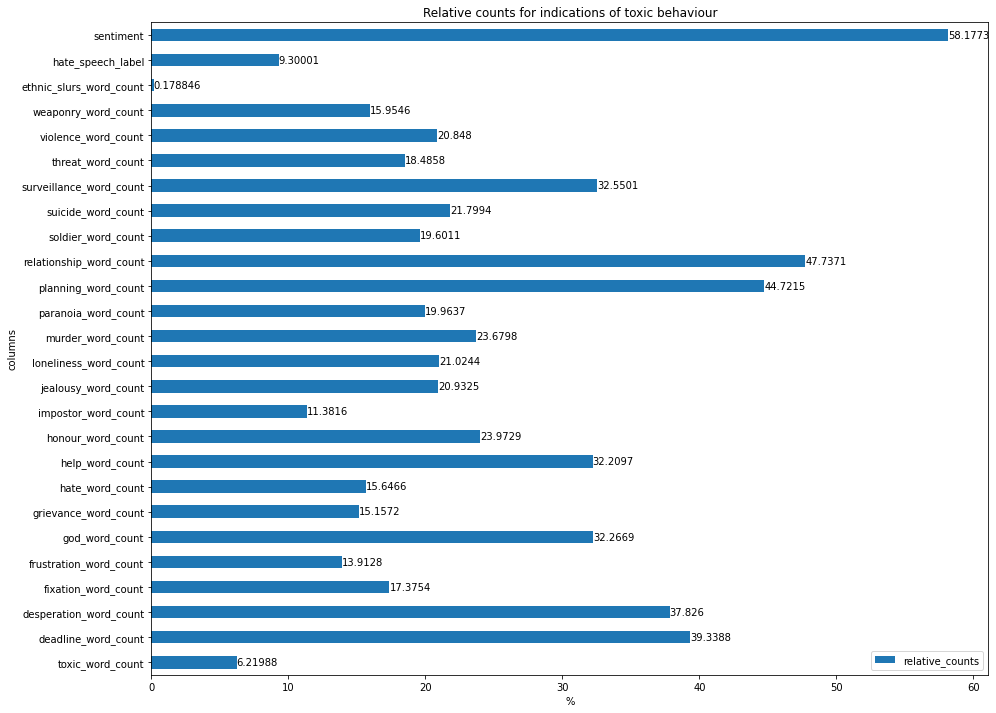

In [112]:
import matplotlib.pyplot as plt
import swifter

relative_counts = []
columns = ['toxic_word_count', 'deadline_word_count',
       'desperation_word_count', 'fixation_word_count',
       'frustration_word_count', 'god_word_count', 'grievance_word_count',
       'hate_word_count', 'help_word_count', 'honour_word_count',
       'impostor_word_count', 'jealousy_word_count', 'loneliness_word_count',
       'murder_word_count', 'paranoia_word_count', 'planning_word_count',
       'relationship_word_count', 'soldier_word_count', 'suicide_word_count',
       'surveillance_word_count', 'threat_word_count', 'violence_word_count',
       'weaponry_word_count', 'ethnic_slurs_word_count', 'hate_speech_label', 'sentiment']

# calculate relative counts
for column in columns[:-2]:
    relative_count = (comment_df[column].swifter.progress_bar(False).apply(lambda c: 1 if c > 0.0 else 0).sum() * 100) / len(comment_df)
    relative_counts.append(relative_count)

relative_counts.append((comment_df["hate_speech_label"].swifter.progress_bar(False).apply(lambda l: 1 if l != "NON_HATE" else 0).sum() * 100) / len(comment_df))
relative_counts.append((comment_df["sentiment"].swifter.progress_bar(False).apply(lambda l: 1 if l != "POSITIVE" else 0).sum() * 100) / len(comment_df))

ax = pd.DataFrame(
    {
        "relative_counts": relative_counts,
        "columns": columns
    }
).plot(kind="barh", x="columns", y="relative_counts", figsize=(15,12), xlabel="%", title="Relative counts for indications of toxic behaviour")
ax = ax.bar_label(ax.containers[0])

In [113]:
comment_df.hate_speech_score.mean()

0.8822260307092021

In [114]:
comment_df.sentiment_score.mean()

0.9551236870340416

In [120]:
comment_df["contains_toxic_indications"] = comment_df[["sentiment", "hate_speech_label"]].swifter.progress_bar(False).apply(lambda r: 1 if r.sentiment != "POSITIVE" or r.hate_speech_label != "NON_HATE" else 0, axis=1)
grouped = comment_df[["video_id", "contains_toxic_indications"]].groupby(by="video_id").sum()
grouped.index = grouped.index.astype(str)
videos.video_id = videos.video_id.astype(str)
videos = pd.merge(videos, grouped, left_on="video_id", right_index=True)
videos.published_at = pd.to_datetime(videos.published_at)
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 491
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   video_id                    491 non-null    object             
 1   title                       491 non-null    object             
 2   description                 491 non-null    object             
 3   channel                     491 non-null    object             
 4   published_at                491 non-null    datetime64[ns, UTC]
 5   tags                        487 non-null    object             
 6   like_count                  491 non-null    object             
 7   favorite_count              491 non-null    object             
 8   comment_count               491 non-null    object             
 9   contains_toxic_indications  491 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 4

<AxesSubplot: xlabel='published_at'>

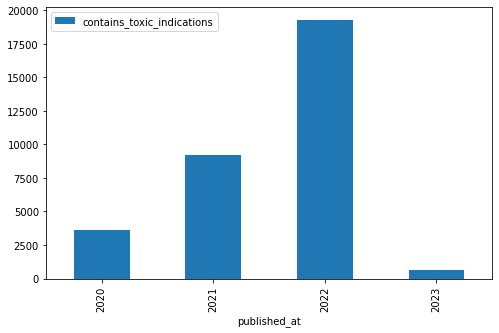

In [141]:
videos.groupby(by=videos.published_at.dt.year).sum().plot(kind='bar', figsize=(8,5))

In [133]:
videos.groupby(by=[videos.published_at.dt.year ,videos.published_at.dt.month]).sum()

contains_toxic_indications
published_at published_at                            
2020         3                                    633
             5                                     70
             7                                    452
             8                                    506
             9                                    456
             10                                   517
             11                                   374
             12                                   581
2021         2                                    194
             3                                    537
             4                                    921
             5                                    779
             6                                    871
             7                                    817
             8                                    758
             9                                   1519
             10                                   915
             11                                  1024
             12                                   887
2022         1                                    485
             2                                   1100
             3                                   1598
             4                                    720
             5                                   2394
             6                                   1638
             7                                   2028
             8                                   1438
             9                                   2205
             10                                  2805
             11                                  2330
             12                                   561
2023         1                                    620

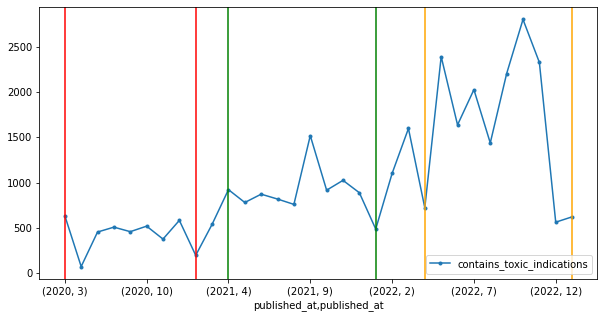

In [139]:
ax = videos.groupby(by=[videos.published_at.dt.year ,videos.published_at.dt.month]).sum().plot(style='.-', figsize=(10,5))
ax.axvline(0, color="red")
ax.axvline(8, color="red")
ax.axvline(10, color="green")
ax.axvline(19, color="green")
ax.axvline(22, color="orange")
ax.axvline(31, color="orange")

In [122]:
grouped.mean()

contains_toxic_indications    52.708696
dtype: float64

In [9]:
comment_df.columns

Index(['video_id', 'id', 'text', 'user', 'like_count', 'published_at',
       'reply_count', 'toxic_word_count', 'deadline_word_count',
       'desperation_word_count', 'fixation_word_count',
       'frustration_word_count', 'god_word_count', 'grievance_word_count',
       'hate_word_count', 'help_word_count', 'honour_word_count',
       'impostor_word_count', 'jealousy_word_count', 'loneliness_word_count',
       'murder_word_count', 'paranoia_word_count', 'planning_word_count',
       'relationship_word_count', 'soldier_word_count', 'suicide_word_count',
       'surveillance_word_count', 'threat_word_count', 'violence_word_count',
       'weaponry_word_count', 'ethnic_slurs_word_count', 'hate_speech_label',
       'hate_speech_score', 'sentiment', 'sentiment_score'],
      dtype='object')

## Bibliography

<!--

In [5]:
import os
os.system("jupyter nbconvert --to markdown final.ipynb")
os.system("pandoc -s final.md -t html -o final.html --citeproc --bibliography=refs.bib --csl=apa.csl")
os.system("pandoc -s final.md -t pdf -o final.pdf --citeproc --bibliography=refs.bib --csl=apa.csl")

[NbConvertApp] Converting notebook final.ipynb to markdown
[NbConvertApp] Support files will be in final_files/
[NbConvertApp] Making directory final_files
[NbConvertApp] Making directory final_files
[NbConvertApp] Writing 44202 bytes to final.md
[WARNING] This document format requires a nonempty <title> element.
  Defaulting to 'final' as the title.
  To specify a title, use 'title' in metadata or --metadata title="...".


0

-->